# __Model Project__

### Imports

In [93]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

%load_ext autoreload
%autoreload 2

from project_functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<br>

### Parameters

<br>

### Popularity

In [94]:
def hype(performances):
    return 1 - performances * 0.25

In [95]:
def visibility(performances):
    return performances * 0.25

In [96]:
def popularity(performances):
    return hype(performances)**0.5 * visibility(performances)**0.8

<br>

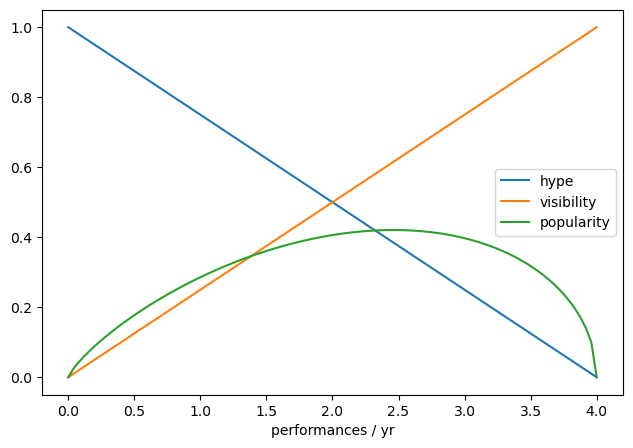

In [97]:
ax = plt.figure(figsize=(7.5,5)).add_subplot()
xs = np.linspace(0,4,100)
ax.plot(xs, hype(xs), label='hype')
ax.plot(xs, visibility(xs), label='visibility')
ax.plot(xs, popularity(xs), label='popularity')
_ = ax.set(xlabel='performances / yr')
_ = ax.legend()

<br>

### Demand and Revenue

In [98]:
def demand(price, performances):
    return 20 * (50 - price) * popularity(performances)

In [99]:
def revenue(price, performances, seats=np.inf):
    return price * np.minimum(seats, demand(price, performances)) # quantity sold is capped at number of seats

<br>

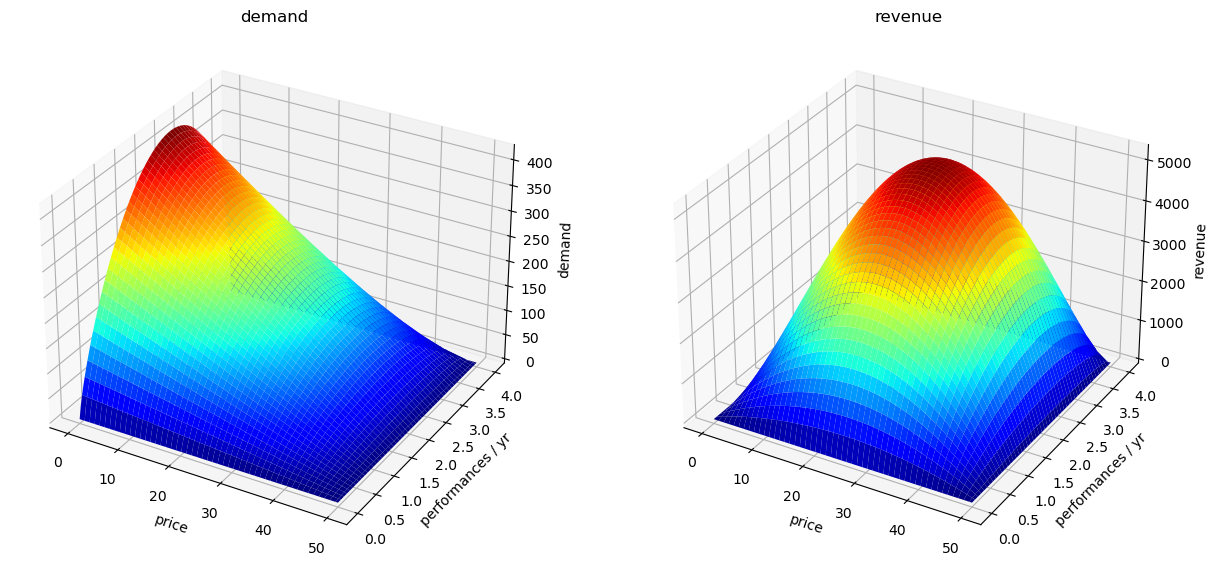

In [100]:
fig, axs = plt.subplots(1, 2, figsize=(15,7.5), subplot_kw={'projection':'3d'})
_ = plot3D(demand, np.linspace(0,50,100), np.linspace(0,4,100), ax=axs[0]).set(title='demand', xlabel='price', ylabel='performances / yr', zlabel='demand')
_ = plot3D(revenue, np.linspace(0,50,100), np.linspace(0,4,100), ax=axs[1]).set(title='revenue', xlabel='price', ylabel='performances / yr', zlabel='revenue')

<br>

### Costs and Profit

In [101]:
def venue_cost(seats):
    seats = np.maximum(0, seats)
    return 5 * seats ** 0.95

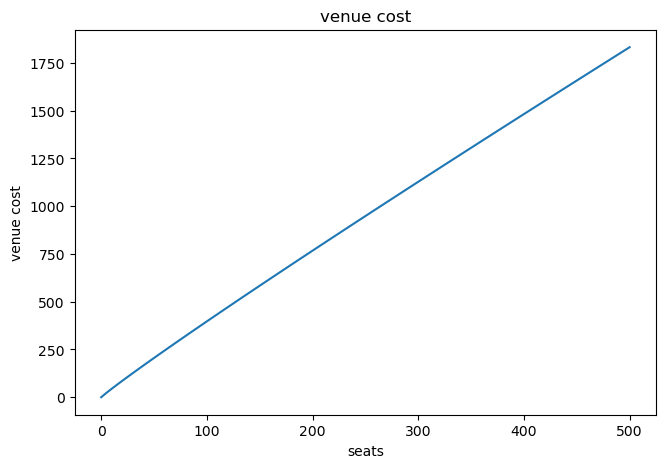

In [102]:
ax = plt.figure(figsize=(7.5,5)).add_subplot()
ax.plot(np.linspace(0,500,100), venue_cost(np.linspace(0,500,100)), label='venue cost')
_ = ax.set(title='venue cost', xlabel='seats', ylabel='venue cost')

<br>

In [103]:
def profit(price, performances): # profit when venue size exactly matches demand
    return revenue(price, performances) - venue_cost(demand(price, performances))

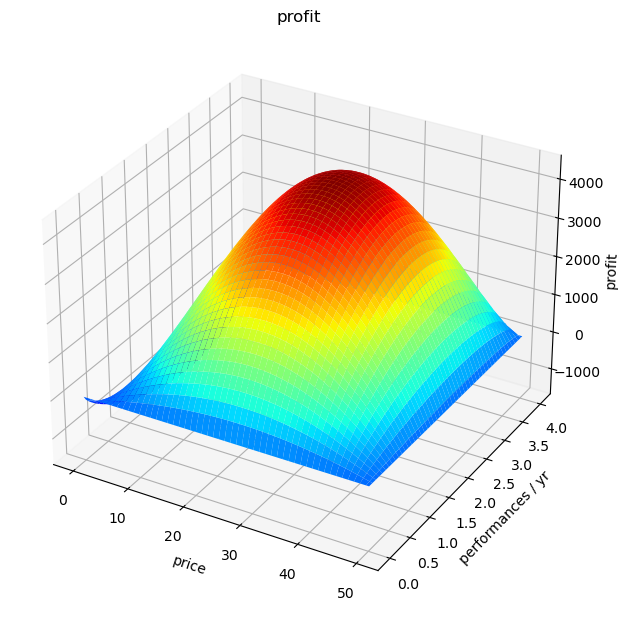

In [104]:
ax = plt.figure(figsize=(7.5,7.5)).add_subplot(projection='3d')
_ = plot3D(profit, np.linspace(0, 50, 100), np.linspace(0,4,100), ax=ax).set(title='profit', xlabel='price', ylabel='performances / yr', zlabel='profit')

<br>

### Limited venues

In [105]:
venues = [100, 150, 250, 500] # number of seats in each venue

def profit_in_venue(price, performances, seats): # profit when venue size is fixed
    return revenue(price, performances, seats) - venue_cost(seats)

<br>

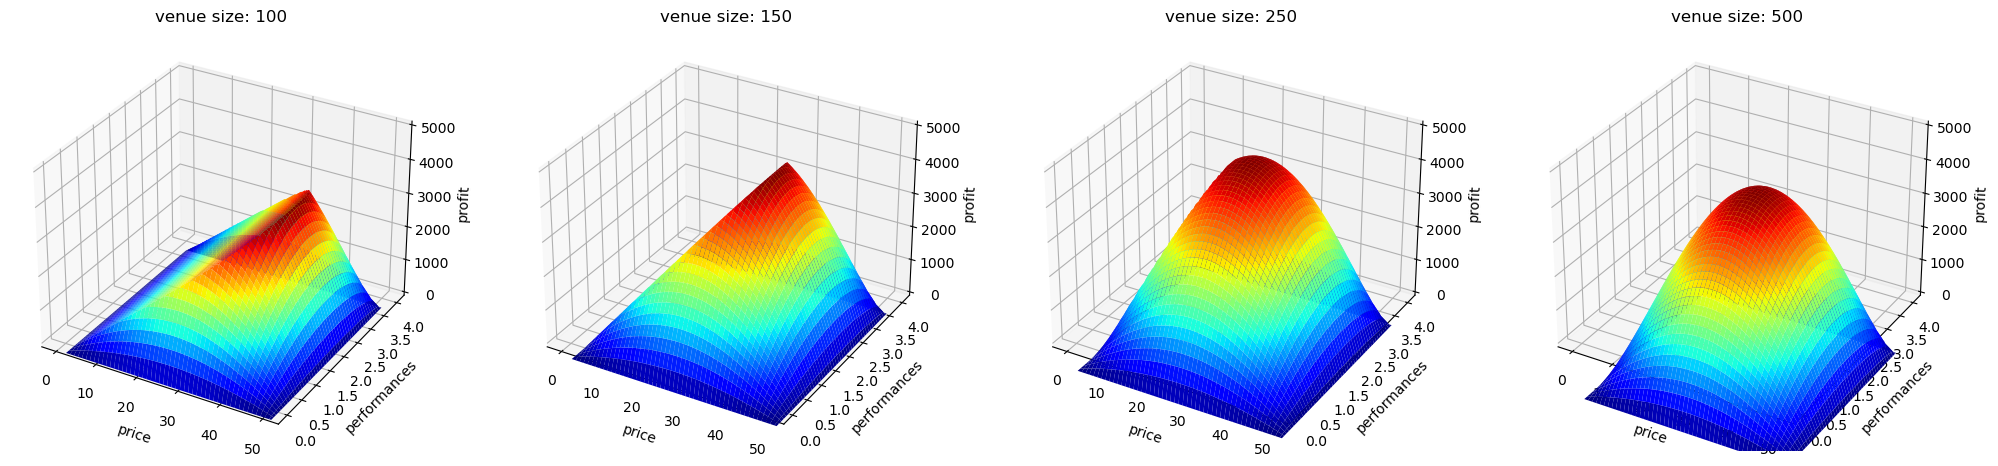

In [108]:
fig, axs = plt.subplots(1, 4, figsize=(25,7.5), subplot_kw={'projection':'3d'})
for i, seats in enumerate(venues):
    ax = plot3D(profit_in_venue, np.linspace(0,50,100), np.linspace(0,4,100), seats, ax=axs[i])
    ax.set(title='venue size: '+str(seats), xlabel='price', ylabel='performances', zlabel='profit', zlim=(0,5000))   